## PythonとTensorFlowでAIを学ぶ (1)
### サンプルコード
[参考サイト](https://www.tensorflow.org/tutorials/keras/classification?hl=ja)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.client import device_lib

2024-02-01 00:31:40.054329: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-01 00:31:40.074789: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 00:31:40.074812: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 00:31:40.075360: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-01 00:31:40.079403: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import os

os.environ["OPENBLAS_NUM_THREADS"] = "20"
os.environ["MKL_NUM_THREADS"] = "20"
os.environ["VECLIB_MAXIMUM_THREADS"] = "20"

In [3]:
print(tf.__version__)

display(device_lib.list_local_devices())
display(tf.config.list_physical_devices("GPU"))

2.15.0


2024-02-01 00:31:40.830006: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 00:31:40.844945: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 00:31:40.844977: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 00:31:40.988366: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 00:31:40.988402: I external/local_xla/xla/stream_executor

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12505591545854347336
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14368636928
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10765942289831560443
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9"
 xla_global_id: 416903419]

2024-02-01 00:31:40.991608: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 00:31:40.991650: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 00:31:40.991659: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### MNISTデータの読み込み
MNIST手書き数字データを読み込みます。

In [4]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# display(type(train_images), type(train_labels), type(test_images), type(test_labels))

In [5]:
display(train_images.shape)
display(test_images.shape)

(60000, 28, 28)

(10000, 28, 28)

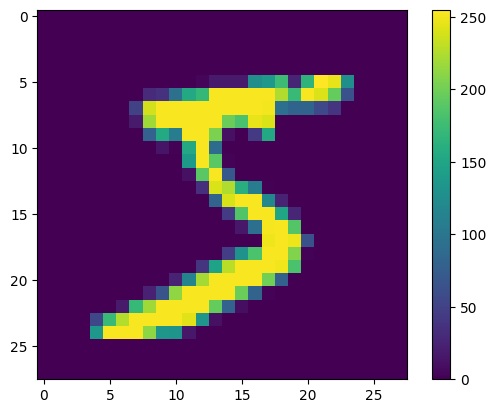

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### データの正規化
読み込んだデータは、0から255までの整数値です。これを、0.0から1.0までの浮動小数点数に変換します。

In [7]:
train_images = (train_images / 255.0).astype(np.float32)
test_images = (test_images / 255.0).astype(np.float32)

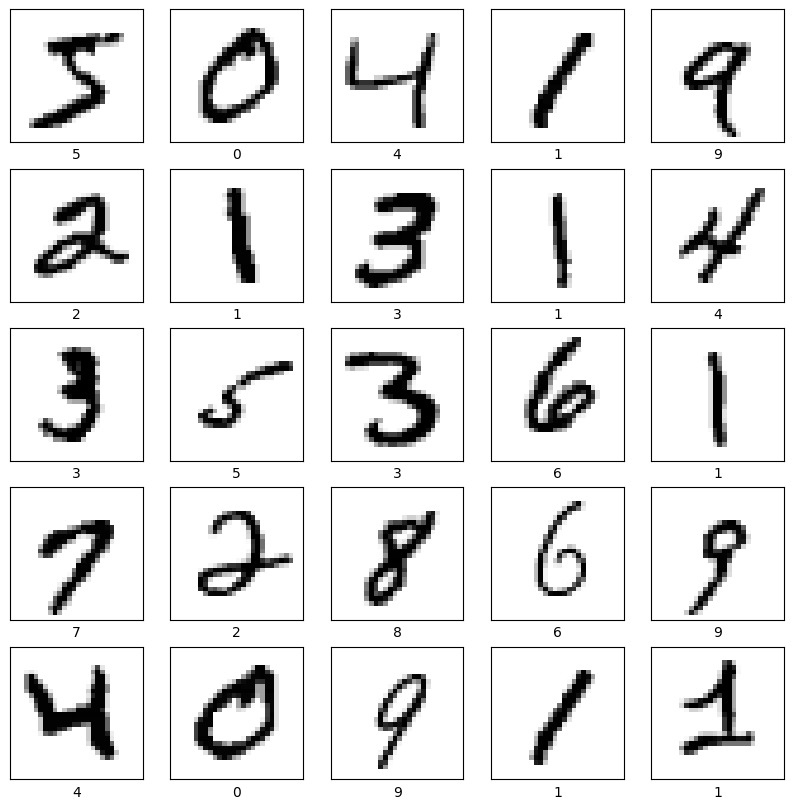

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

### モデルの定義
全結合層を3層重ねたニューラルネットワークを定義します。中間層の活性化関数はReLU、出力層の活性化関数はSoftmaxです。

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

2024-02-01 00:31:41.684815: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 00:31:41.684874: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 00:31:41.684884: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 00:31:41.685051: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-01 00:31:41.685073: I tensorflow/core/common_runtime/gpu/gpu

In [10]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 学習

In [11]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


/home/sonoda/GitHub/investment-study/.tf/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-02-01 00:31:42.399183: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


   1/1875 [..............................] - ETA: 12:40 - loss: 2.2627 - accuracy: 0.1250

2024-02-01 00:31:42.436976: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fa5084fcd90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-01 00:31:42.437002: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Ti, Compute Capability 8.9
2024-02-01 00:31:42.443001: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1706715102.470717   47980 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 3s 2ms/step - loss: 0.9090 - accuracy: 0.7192
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3569 - accuracy: 0.8981
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2966 - accuracy: 0.9150
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2682 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2491 - accuracy: 0.9292


### テストデータで評価
訓練データの精度はあくまで参考値です。未知のデータに対する精度を確認するために、テストデータで評価します。

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2420 - accuracy: 0.9308 - 501ms/epoch - 2ms/step

Test accuracy: 0.9308000206947327


### データごとに正解・不正解を表示

In [13]:
def plot_image(ax, i, predictions_array, true_label, img):
    """
    画像を表示する。

    Args:
        ax (matplotlib.axes.Axes): 表示するAxes
        i (int): 表示する画像のインデックス
        predictions_array (np.ndarray): 予測結果
        true_label (np.ndarray): 正解ラベル
        img (np.ndarray): 画像
    """
    true_label, img = true_label[i], img[i]
    ax.imshow(img, cmap=plt.cm.binary)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    ax.set_xlabel(f"{predicted_label} {100*np.max(predictions_array):2.0f}% ({true_label})", color=color)

def plot_value_array(ax, i, predictions_array, true_label):
    true_label = true_label[i]
    ax.grid(False)
    ax.set_xticks(range(10))
    ax.set_yticks([])
    
    thisplot = ax.bar(range(10), predictions_array, color="#777777")
    ax.set_ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 [==============================] - 0s 816us/step


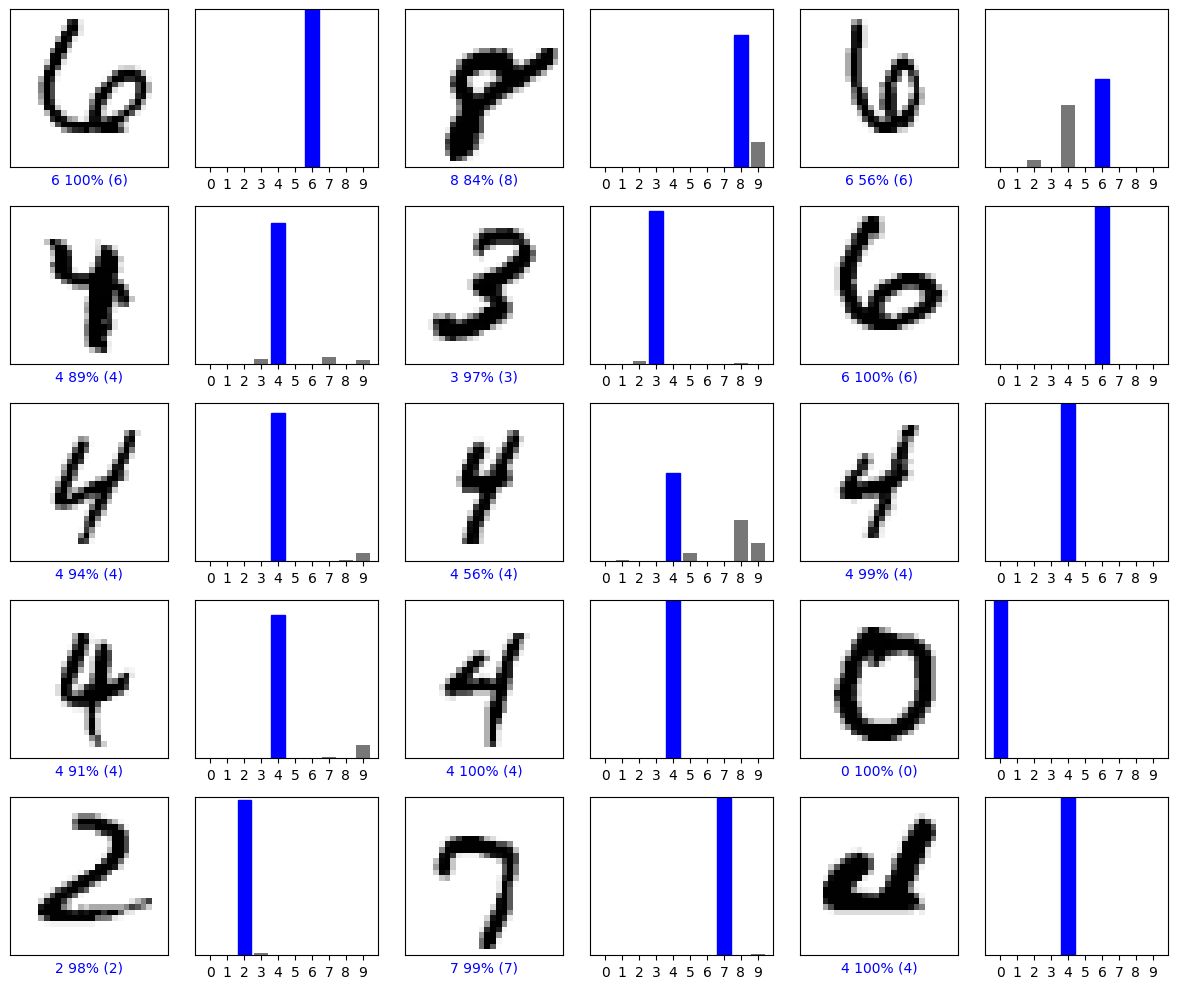

In [14]:
predictions = model.predict(test_images)
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
random_indices = np.random.choice(len(test_images), num_images, replace=False)

fig, axes = plt.subplots(num_rows, 2*num_cols, figsize=(2*2*num_cols, 2*num_rows))

for i, idx in enumerate(random_indices):
    # idx = i
    plot_image(axes[i//num_cols, 2*(i%num_cols)], idx, predictions[idx], test_labels, test_images)
    plot_value_array(axes[i//num_cols, 2*(i%num_cols) + 1], idx, predictions[idx], test_labels)

fig.tight_layout()
plt.show()

### NumPyだけで実装してみる

In [15]:
class SimpleNeuralNetworkNumpy:
    """
    NumPyを使ったニューラルネットワーク。
    """
    def __init__(self):
        self.parameters = self.initialize_parameters()

    def initialize_parameters(self):
        """
        各層の重みとバイアスを初期化。

        Returns:
            Dictionary[str, np.ndarray]: 各層の重みとバイアス
        """
        # 16行784列の行列。
        W1 = np.random.normal(size=(16, 784), scale=0.1).astype(np.float32)
        # 長さ16のベクトル。
        b1 = np.zeros((16,), dtype=np.float32)
        # 16行16列の行列。
        W2 = np.random.normal(size=(16, 16), scale=0.1).astype(np.float32)
        # 長さ16のベクトル。
        b2 = np.zeros((16,), dtype=np.float32)
        # 10行16列の行列。
        W3 = np.random.normal(size=(10, 16), scale=0.1).astype(np.float32)
        # 長さ10のベクトル。
        b3 = np.zeros((10,), dtype=np.float32)
        return {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    
    def forward_pass(self, x):
        """
        順伝播。

        Args:
            x (np.ndarray): 入力データ (784)
        
        Returns:
            Tuple[np.ndarray, np.ndarray, np.ndarray]: 各層の出力
        """
        z1 = np.matmul(self.parameters["W1"], x) + self.parameters["b1"]
        a1 = np.maximum(z1, 0) # ReLU
        z2 = np.matmul(self.parameters["W2"], a1) + self.parameters["b2"]
        a2 = np.maximum(z2, 0) # ReLU
        z3 = np.matmul(self.parameters["W3"], a2) + self.parameters["b3"]
        logits = z3 - np.max(z3)
        e_x = np.exp(logits)
        a3 = e_x / np.sum(e_x) # softmax
        return a1, a2, a3

    def compute_loss(self, a3, y):
        """
        交差エントロピー誤差。
        バッチ内の誤差の平均を返す。

        Args:
            a3 (np.ndarray): 出力層の出力 (10)
            y (np.ndarray): 正解ラベル (10)

        Returns:
            float: 交差エントロピー誤差
        """
        return -np.sum(y * np.log(a3))
    
    def backward_pass(self, x, y, a1, a2, a3):
        """
        誤差逆伝播。

        Args:
            x (np.ndarray): 入力データ (784)
            y (np.ndarray): 正解ラベル (10)
            a1 (np.ndarray): 中間層1の出力 (16)
            a2 (np.ndarray): 中間層2の出力 (16)
            a3 (np.ndarray): 出力層の出力 (10)
        
        Returns:
            Dictionary[str, np.ndarray]: 各層の勾配
        """
        # 出力層の勾配。
        dZ3 = a3 - y
        dW3 = np.outer(dZ3, a2) # テンソル積 (10, 16)
        db3 = dZ3
        # 中間層2の勾配。
        dA2 = np.matmul(self.parameters["W3"].T, dZ3)
        dZ2 = dA2 * np.greater(a2, 0).astype(np.float32)
        dW2 = np.outer(dZ2, a1) # テンソル積 (16, 16)
        db2 = dZ2
        # 中間層1の勾配。
        dA1 = np.matmul(self.parameters["W2"].T, dZ2)
        dZ1 = dA1 * np.greater(a1, 0).astype(np.float32)
        dW1 = np.outer(dZ1, x) # テンソル積 (16, 784)
        db1 = dZ1
        return {"dW3": dW3, "db3": db3, "dW2": dW2, "db2": db2, "dW1": dW1, "db1": db1}
    
    def update_parameters(self, gradients, learning_rate=0.1):
        """
        パラメータの更新。

        Args:
            gradients (Dictionary[str, np.ndarray]): 各層の勾配
            learning_rate (float, optional): 学習率
        """
        for key in self.parameters:
            self.parameters[key] -= learning_rate * gradients[f"d{key}"]
    
    def compute_accuracy(self, x, correct_label):
        """
        精度を計算する。
        単一データなので正解なら1、不正解なら0を返す。

        Args:
            x (np.ndarray): 入力データ (784)
            correct_label (int): 正解ラベル
        
        Returns:
            float: 精度
        """
        _, _, a3 = self.forward_pass(x)
        prediction = np.argmax(a3)
        return float(prediction == correct_label)

In [16]:
EPOCHS = 5

model = SimpleNeuralNetworkNumpy()

for epoch in range(EPOCHS):
    total_loss = 0.0
    total_accuracy = 0.0
    
    for i, (x, correct_label) in enumerate(zip(train_images, train_labels)):
        # x = train_images[i]
        # y = train_labels[i]
        x = x.reshape(784)
        y = np.zeros((10,), dtype=np.float32)
        y[correct_label] = 1.0
        # 順伝播。
        a1, a2, a3 = model.forward_pass(x)
        # 損失を計算。
        loss = model.compute_loss(a3, y)
        # 誤差逆伝播。
        gradients = model.backward_pass(x, y, a1, a2, a3)
        # パラメータを更新。
        # 一つのデータごとに更新するので、学習率は小さめにする。
        model.update_parameters(gradients, learning_rate=0.001)
        
        total_loss += loss
        total_accuracy += model.compute_accuracy(x, correct_label)
    
    print(f"Epoch {epoch + 1}: loss={total_loss / len(train_images)}, accuracy={total_accuracy / len(train_images)}")

Epoch 1: loss=0.824640597862212, accuracy=0.7734833333333333
Epoch 2: loss=0.3433116718743188, accuracy=0.93075
Epoch 3: loss=0.28006040278058925, accuracy=0.9473666666666667
Epoch 4: loss=0.2414584222663365, accuracy=0.9566333333333333
Epoch 5: loss=0.2159609953500775, accuracy=0.9627


In [17]:
# テストデータで精度を計算。
total_accuracy = 0.0
for i, (x, y) in enumerate(zip(test_images, test_labels)):
    total_accuracy += model.compute_accuracy(x.reshape(784), y)

print(f"Test accuracy: {total_accuracy / len(test_images)}")

Test accuracy: 0.9295


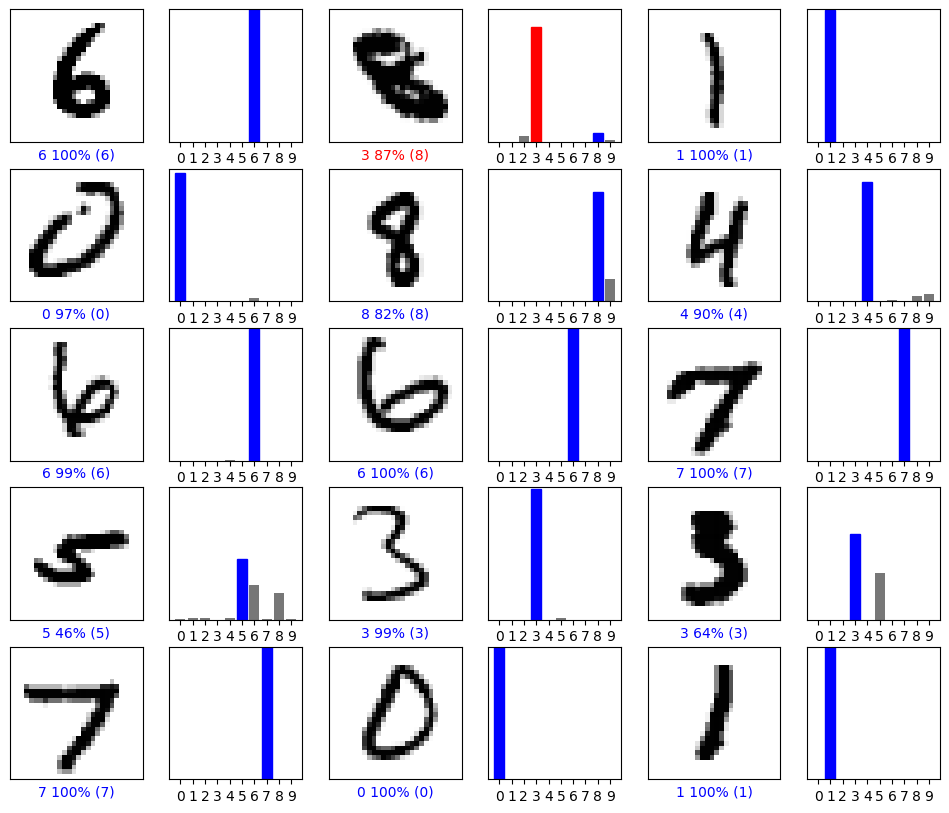

In [18]:
# 正解・不正解の画像を表示する。
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
random_indices = np.random.choice(len(test_images), num_images, replace=False)

fig, axes = plt.subplots(num_rows, 2*num_cols, figsize=(2*2*num_cols, 2*num_rows))

for i, idx in enumerate(random_indices):
    # idx = i
    x = test_images[idx].reshape(784)
    _, _, a3 = model.forward_pass(x)
    plot_image(axes[i//num_cols, 2*(i%num_cols)], idx, a3, test_labels, test_images)
    plot_value_array(axes[i//num_cols, 2*(i%num_cols) + 1], idx, a3, test_labels)

### バッチを使ってみる

In [19]:
class SimpleNeuralNetworkNumpyBatch:
    """
    NumPyを使ったニューラルネットワーク。
    複数のデータをまとめて処理できるように改良。
    """
    def __init__(self):
        self.parameters = self.initialize_parameters()

    def initialize_parameters(self):
        """
        各層の重みとバイアスを初期化。

        Returns:
            Dictionary[str, np.ndarray]: 各層の重みとバイアス
        """
        # 16行784列の行列。
        W1 = np.random.normal(size=(16, 784), scale=0.1).astype(np.float32)
        # 長さ16の列ベクトル。
        b1 = np.zeros((16, 1), dtype=np.float32)
        # 16行16列の行列。
        W2 = np.random.normal(size=(16, 16), scale=0.1).astype(np.float32)
        # 長さ16の列ベクトル。
        b2 = np.zeros((16, 1), dtype=np.float32)
        # 10行16列の行列。
        W3 = np.random.normal(size=(10, 16), scale=0.1).astype(np.float32)
        # 長さ10の列ベクトル。
        b3 = np.zeros((10, 1), dtype=np.float32)
        return {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    
    def forward_pass(self, X):
        """
        順伝播。

        Args:
            X (np.ndarray): 入力データのバッチ (batch_size, 784)
        
        Returns:
            tuple[np.ndarray, np.ndarray, np.ndarray]: 各層の出力
        """
        Z1 = np.matmul(self.parameters["W1"], X) + self.parameters["b1"]
        A1 = np.maximum(Z1, 0) # ReLU
        Z2 = np.matmul(self.parameters["W2"], A1) + self.parameters["b2"]
        A2 = np.maximum(Z2, 0) # ReLU
        Z3 = np.matmul(self.parameters["W3"], A2) + self.parameters["b3"]
        logits = Z3 - np.max(Z3, axis=1, keepdims=True)
        e_x = np.exp(logits)
        A3 = e_x / np.sum(e_x, axis=1, keepdims=True) # softmax
        return A1, A2, A3

    def compute_loss(self, A3, Y):
        """
        交差エントロピー誤差。
        バッチ内の誤差の平均を返す。

        Args:
            A3 (np.ndarray): 出力層の出力 (batch_size, 10)
            Y (np.ndarray): 正解ラベルのバッチ (batch_size, 10)

        Returns:
            float: 交差エントロピー誤差
        """
        m = Y.shape[0]
        return -np.sum(Y * np.log(A3)) / m
    
    def backward_pass(self, X, Y, A1, A2, A3):
        """
        誤差逆伝播。

        Args:
            X (np.ndarray): 入力データのバッチ (batch_size, 784)
            Y (np.ndarray): 正解ラベルのバッチ (batch_size, 10)
            A1 (np.ndarray): 中間層1の出力 (batch_size, 16)
            A2 (np.ndarray): 中間層2の出力 (batch_size, 16)
            A3 (np.ndarray): 出力層の出力 (batch_size, 10)
        
        Returns:
            Dictionary[str, np.ndarray]: 各層の勾配
        """
        # バッチサイズ取得。
        m = X.shape[0]
        # 出力層の勾配。
        dZ3 = A3 - Y
        dW3 = dZ3 * A2.reshape(m, 1, -1)
        db3 = dZ3
        # 中間層2の勾配。
        dA2 = np.matmul(self.parameters["W3"].T, dZ3)
        dZ2 = dA2 * np.greater(A2, 0).astype(np.float32)
        dW2 = dZ2 * A1.reshape(m, 1, -1)
        db2 = dZ2
        # 中間層1の勾配。
        dA1 = np.matmul(self.parameters["W2"].T, dZ2)
        dZ1 = dA1 * np.greater(A1, 0).astype(np.float32)
        dW1 = dZ1 * X.reshape(m, 1, -1)
        db1 = dZ1
        return {"dW3": dW3, "db3": db3, "dW2": dW2, "db2": db2, "dW1": dW1, "db1": db1}
    
    def update_parameters(self, gradients, learning_rate=0.1):
        """
        パラメータの更新。

        Args:
            gradients (Dictionary[str, np.ndarray]): 各層の勾配
            learning_rate (float, optional): 学習率
        """
        for key in self.parameters:
            gradients_mean = np.mean(gradients[f"d{key}"], axis=0).reshape(self.parameters[key].shape)
            self.parameters[key] -= learning_rate * gradients_mean
    
    def compute_accuracy(self, X, correct_labels):
        """
        精度を計算する。

        Args:
            X (np.ndarray): 入力データのバッチ (batch_size, 784)
            correct_labels (np.ndarray): 正解ラベルのバッチ (batch_size, 10)
        
        Returns:
            float: 精度
        """
        _, _, A3 = self.forward_pass(X)
        predictions = np.argmax(A3, axis=1)
        accuracy = np.mean(predictions == correct_labels.reshape(-1, 1))
        return accuracy

In [20]:
BATCH_SIZE = 32
EPOCHS = 5

model = SimpleNeuralNetworkNumpyBatch()

for epoch in range(EPOCHS):
    total_loss = 0.0
    total_accuracy = 0.0
    batches = 0

    for batch in range(len(train_images) // BATCH_SIZE):
        batch_images = train_images[batch * BATCH_SIZE:(batch + 1) * BATCH_SIZE]
        X = np.reshape(batch_images, [-1, 784, 1])
        batch_labels = train_labels[batch * BATCH_SIZE:(batch + 1) * BATCH_SIZE]
        # 正解ラベルをワンホットベクトルに変換。
        Y = np.eye(10)[batch_labels].astype(np.float32)[..., np.newaxis]

        A1, A2, A3 = model.forward_pass(X)
        loss = model.compute_loss(A3, Y)
        gradients = model.backward_pass(X, Y, A1, A2, A3)
        model.update_parameters(gradients, learning_rate=0.01)

        accuracy = model.compute_accuracy(X, batch_labels)

        total_loss += loss
        total_accuracy += accuracy
        batches += 1
    
    avg_loss = total_loss / batches
    avg_accuracy = total_accuracy / batches
    print(f"Epoch: {epoch + 1}, Loss: {avg_loss}, Accuracy: {avg_accuracy}")

Epoch: 1, Loss: 1.5176400456269583, Accuracy: 0.4872666666666667
Epoch: 2, Loss: 0.5298285271962484, Accuracy: 0.8545166666666667
Epoch: 3, Loss: 0.4005237276484569, Accuracy: 0.8957333333333334
Epoch: 4, Loss: 0.35481257201333843, Accuracy: 0.9095666666666666
Epoch: 5, Loss: 0.3252554265658061, Accuracy: 0.91775


In [21]:
# 得られたモデルでテストデータの精度を計算。
reshaped_test_images = np.reshape(test_images, [-1, 784, 1])
test_accuracy = model.compute_accuracy(reshaped_test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.9056


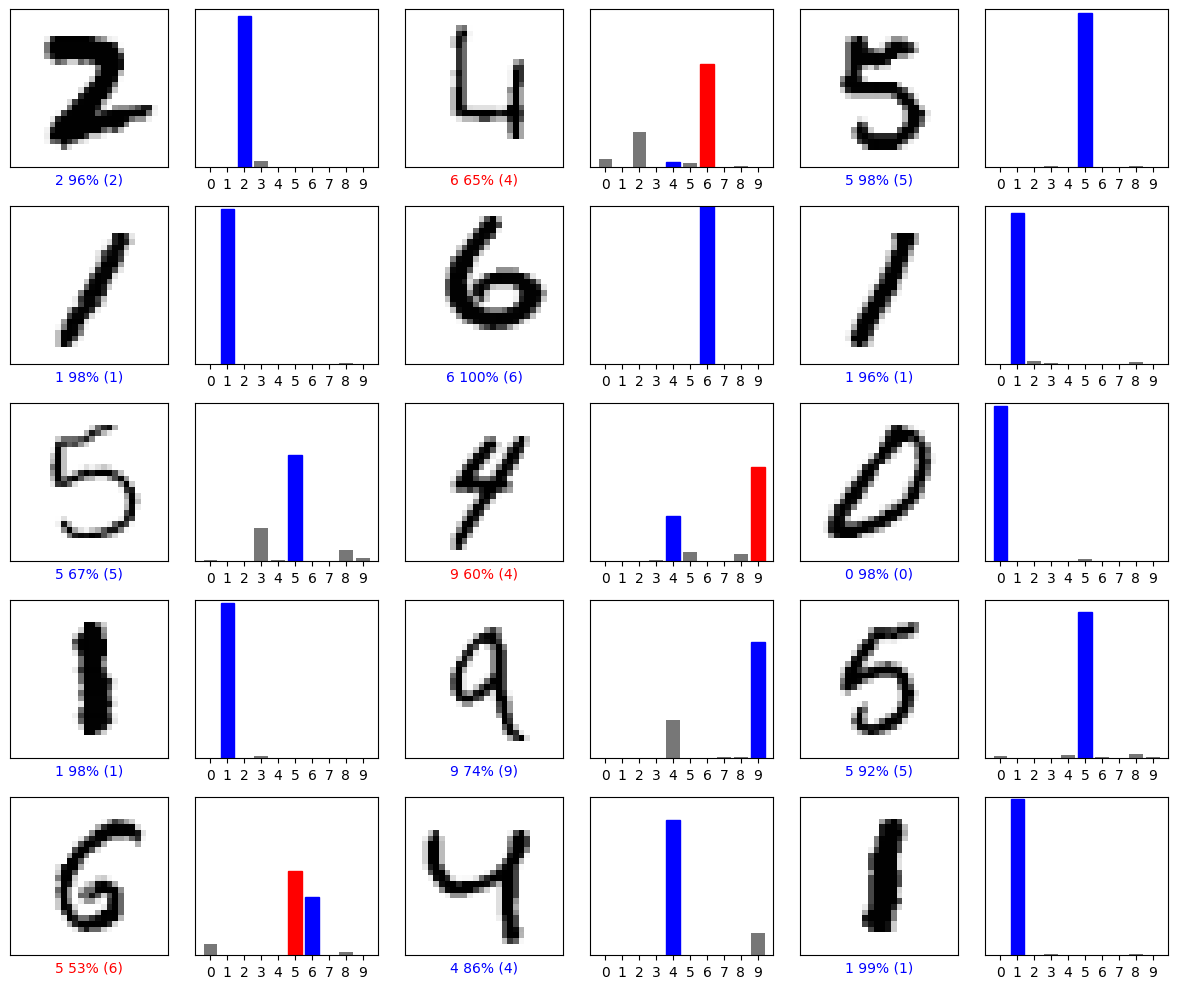

In [22]:
# 予測した結果をプロット。
predictions = model.forward_pass(reshaped_test_images)[-1][..., 0]
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
random_indices = np.random.choice(len(test_images), num_images, replace=False)

fig, axes = plt.subplots(num_rows, 2*num_cols, figsize=(2*2*num_cols, 2*num_rows))

for i, idx in enumerate(random_indices):
    # idx = i
    plot_image(axes[i//num_cols, 2*(i%num_cols)], idx, predictions[idx], test_labels, test_images)
    plot_value_array(axes[i//num_cols, 2*(i%num_cols) + 1], idx, predictions[idx], test_labels)

fig.tight_layout()
plt.show()